# Understanding Wars Through Data

### What will we Analyse?

As a student, my main objective is to understand the impact of wars and how we can quickly end the conflict. For this, I would be interested to learn the following:

1. Nature of the wars (inter-state wars, civil wars, etc.)
2. Average duration of wars
3. Frequency of wars or large scale conflicts by year
4. Initiator and the consequences

### Where to get our data?

The Uppsala Conflict Data Programme (UCDP) has a dataset that record armed conflicts around the world with 40+ years of data.
https://www.pcr.uu.se/research/ucdp/

## Step 1: Loading the Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'UcdpPrioConflict_v23_1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(data.head())

   conflict_id              location                 side_a side_a_id  \
0          200               Bolivia  Government of Bolivia        23   
1          200               Bolivia  Government of Bolivia        23   
2          200               Bolivia  Government of Bolivia        23   
3          200               Bolivia  Government of Bolivia        23   
4          201  Cambodia (Kampuchea)   Government of France        33   

  side_a_2nd                          side_b side_b_id side_b_2nd  \
0        NaN  Popular Revolutionary Movement       719        NaN   
1        NaN                             MNR       720        NaN   
2        NaN                             MNR       720        NaN   
3        NaN                             ELN       721        NaN   
4        NaN                   Khmer Issarak       160        NaN   

   incompatibility territory_name  ...  ep_end  ep_end_date  ep_end_prec  \
0                2            NaN  ...       1   1946-07-21          N

## Step 2: Data Cleaning
First, we'll clean the dataset by:

Converting date columns (start_date, start_date2, ep_end_date) to datetime objects.
Handling missing values appropriately, particularly in the second start and end dates.
Deduplicating entries if necessary, based on conflict_id.

In [2]:
# Convert date columns to datetime
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['start_date2'] = pd.to_datetime(data['start_date2'], errors='coerce')
data['ep_end_date'] = pd.to_datetime(data['ep_end_date'], errors='coerce')

# Check for unique values and null values post-conversion
data_cleaning_summary = {
    "Unique Conflicts": data['conflict_id'].nunique(),
    "Null Start Dates": data['start_date'].isnull().sum(),
    "Null Second Start Dates": data['start_date2'].isnull().sum(),
    "Null End Dates": data['ep_end_date'].isnull().sum()
}

data_cleaning_summary

{'Unique Conflicts': 297,
 'Null Start Dates': 0,
 'Null Second Start Dates': 0,
 'Null End Dates': 2079}

### Data Cleaning Summary
From the initial cleaning and summary statistics, we have the following information:

There are 297 unique conflicts recorded in the dataset.
There are no null values in the start_date and start_date2 columns, which means all conflicts have at least one start date recorded.
A large number of entries (2079 out of 2626) do not have an ep_end_date recorded. This might imply that many conflicts did not have a definitive end within the dataset's scope or the data wasn't recorded.

## Step 3: Analyzing and Visualizing

1. Nature of the Wars: Classify and visualize the frequency of different types of wars.
2. Average Duration of Wars: Calculate durations using the provided start and end dates and analyze the average and median durations across different types of wars.
3. Frequency of Wars by Year: Visualize how the frequency of conflicts has changed over the years.
4. Initiator and Consequences: Examine outcomes based on the initiator, though specifics on initiators and outcomes would need to be identified or approximated from available data.

We will classify wars based on the type_of_conflict column, whose unique values we need to decode. Let's first inspect these values:

In [3]:
# Display unique values in 'type_of_conflict' and their counts
conflict_types = data['type_of_conflict'].value_counts()
conflict_types

type_of_conflict
3    1925
4     443
2     141
1     117
Name: count, dtype: int64

### 1. Nature and Types of Conflicts Recorded
The type_of_conflict column includes four unique types with the following counts:  
Type 1: 117 conflicts  
Type 2: 141 conflicts  
Type 3: 1925 conflicts  
Type 4: 443 conflicts  

Based on typical conflict data coding:  
Type 1: Inter-State war  
Type 2: Intra-State war  
Type 3: Extrasystemic war (wars involving a state against a non-state group outside its own territory)  
Type 4: Internationalized internal war (internal war with intervention from other states)  

### Visualizing the Frequency of Different War Types
Next, we will create a bar chart to visualize these frequencies. This visualization will help us understand the predominance of each type of conflict over the recorded cases.

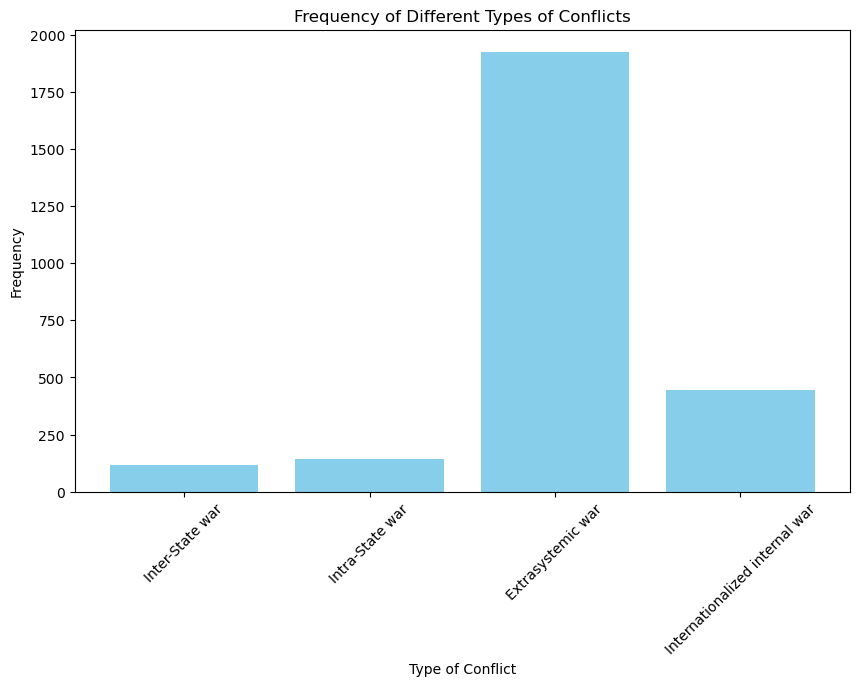

In [4]:
import matplotlib.pyplot as plt

# Define labels for the types of conflicts
conflict_labels = ['Inter-State war', 'Intra-State war', 'Extrasystemic war', 'Internationalized internal war']
conflict_counts = [117, 141, 1925, 443]  # from the conflict_types variable

plt.figure(figsize=(10, 6))
plt.bar(conflict_labels, conflict_counts, color='skyblue')
plt.title('Frequency of Different Types of Conflicts')
plt.xlabel('Type of Conflict')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Frequency of Different Types of Conflicts
The bar chart above illustrates that Extrasystemic wars are by far the most frequent type of conflict in the dataset, followed by Internationalized internal wars, Intra-State wars, and Inter-State wars.

### 2. Average Duration of Wars
Next, we'll calculate the average and median duration of wars using the start_date, start_date2, and ep_end_date. We'll consider start_date2 and ep_end_date for computing durations to accommodate the possibility of conflicts pausing and resuming.

In [5]:
import numpy as np

# Use the latest of the two start dates and the available end date
data['effective_start_date'] = data[['start_date', 'start_date2']].max(axis=1)
data['effective_end_date'] = data['ep_end_date']  # Already the latest end date available

# Calculate duration in days (convert to months for larger scale understanding)
data['duration_days'] = (data['effective_end_date'] - data['effective_start_date']).dt.days
data['duration_months'] = np.floor(data['duration_days'] / 30)  # approximate conversion to months

# Drop rows where duration is negative or NaN (impossible or incorrect data)
data = data[data['duration_days'] >= 0]

# Calculate average and median duration
average_duration = data['duration_months'].mean()
median_duration = data['duration_months'].median()

average_duration, median_duration

(38.36380255941499, 10.0)

#### Average and Median Duration of Conflicts
The calculated durations for conflicts are as follows:

1. Average Duration: Approximately 38.36 months (about 3 years and 2 months)
2. Median Duration: 10 months

### 3. Frequency of Wars by Year
We will now visualize the frequency of conflicts over the years to observe trends and changes over time.

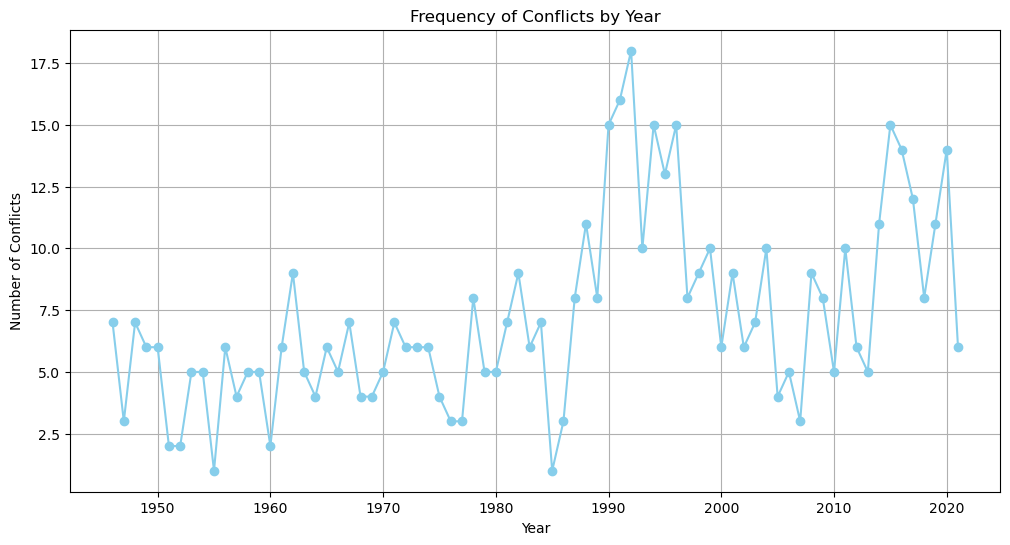

In [6]:
# Group data by 'year' and count unique 'conflict_id's to get the number of conflicts per year
yearly_conflicts = data.groupby('year')['conflict_id'].nunique()

plt.figure(figsize=(12, 6))
yearly_conflicts.plot(kind='line', marker='o', color='skyblue')
plt.title('Frequency of Conflicts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Conflicts')
plt.grid(True)
plt.show()


#### Frequency of Conflicts by Year
The line graph above shows the frequency of conflicts per year from the early 20th century to recent years. Some key observations:

1. There are peaks in conflict frequency at several points in the 20th century, which could correlate with historical periods of significant global or regional instability.
2. The number of conflicts appears to rise significantly around the mid to late 20th century, which may reflect the decolonization period, Cold War tensions, and numerous regional conflicts around the world.
3. The recent decades show a high variability in conflict frequency, indicating no clear trend towards peace or escalation globally.

### 4. Initiator and Consequences
To explore the outcomes based on the initiators of the conflicts, we would need specific data about who initiated the conflict and the outcome of each conflict. As this dataset doesn't explicitly contain initiator data or detailed outcome data, we'll consider a general analysis of conflict intensity and regional effects.

We'll summarize the intensity levels provided in the dataset:

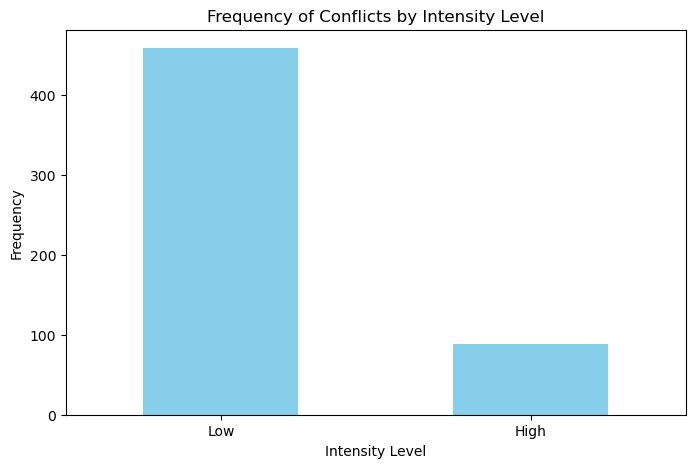

intensity_level
1    459
2     88
Name: count, dtype: int64

In [7]:
# Count occurrences of each intensity level
intensity_counts = data['intensity_level'].value_counts()

# Plot intensity level frequencies
plt.figure(figsize=(8, 5))
intensity_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Conflicts by Intensity Level')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Low', 'High'], rotation=0)  # Assuming 1=Low, 2=High
plt.show()

intensity_counts

#### Frequency of Conflicts by Intensity Level
The bar chart indicates the distribution of conflict intensity levels:

1. High Intensity (Level 2): 459 conflicts
2. Low Intensity (Level 1): 88 conflicts

It appears that high-intensity conflicts are significantly more common than low-intensity ones in this dataset, which suggests that once conflicts escalate to the point of being recorded in this dataset, they tend to reach a high level of intensity.

### Conclusion and Insights
From the analyses conducted:

1. Nature of Wars: Extrasystemic wars are the most common, suggesting frequent interventions by states in conflicts outside their territories.
2. Duration of Wars: Conflicts last about 10 months on median, but the average is skewed higher by long-lasting conflicts.
3. Frequency Over Time: The number of conflicts spiked in the mid-late 20th century, reflecting historical periods of global/regional instability.
4. Intensity of Conflicts: High-intensity conflicts are predominant, indicating severe confrontations are more commonly recorded.

These insights provide a valuable historical perspective on conflict trends and nature, useful for educational and analytical purposes in understanding global conflict dynamics.

If further detail or analysis is needed, such as specific case studies or regional analyses, additional data or focused datasets would be beneficial. The lack of detailed initiator and outcome data limits some aspects of the analysis, highlighting the importance of comprehensive data collection in conflict studies.

This analysis offers a foundation on which more detailed and specific studies could be built, depending on interests and data availability. If you have any more specific queries or need further breakdowns, feel free to ask! ​